# Problem 1

## derivation in file 1

## Part 1.1 code and plots

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import math 
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
rand.seed(0)
np.random.seed(0)

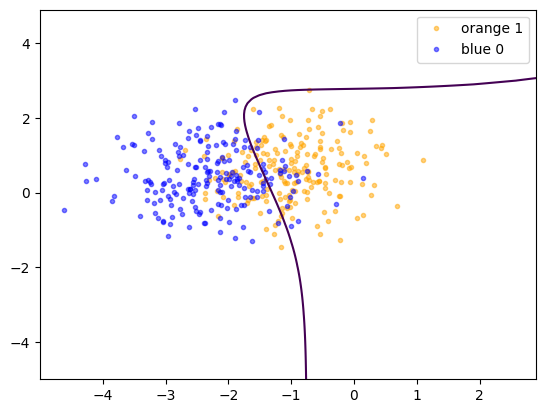

In [9]:

x, y = np.mgrid[-3:3:0.1, -5:5:0.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

# Compute the likelihood ratio for each point on the grid
f1 = .3 * multivariate_normal.pdf(pos, mean=[1,0], cov=np.identity(2)) + .7 * multivariate_normal.pdf(pos, mean=[0,1], cov=np.identity(2))
f2 = .8 * multivariate_normal.pdf(pos, mean=[-3,0], cov=np.identity(2)) + .2 * multivariate_normal.pdf(pos, mean=[0,2], cov=np.identity(2))

# Plot the decision boundary where the likelihood ratio is equal to 1

f1_x = .3*np.random.multivariate_normal([-3,0], np.identity(2), 200) + .7*np.random.multivariate_normal([0,1], np.identity(2), 200) # orange class
f2_x = .8*np.random.multivariate_normal([-3,0], np.identity(2), 200) + .2*np.random.multivariate_normal([0,2], np.identity(2), 200) # blue class
plt.plot(f1_x[:, 0], f1_x[:, 1], '.', alpha=0.5,color='orange' ,label='orange 1')
plt.plot(f2_x[:, 0], f2_x[:, 1], '.', alpha=0.5,color='blue', label='blue 0')
plt.legend()
plt.contour(x, y, f1 - f2, [0])
plt.show()

## Part 1.2

The below knn implementation is all from following: https://pythonspot.com/k-nearest-neighbors/, https://stackoverflow.com/questions/50997928/typeerror-only-integer-scalar-arrays-can-be-converted-to-a-scalar-index-with-1d, https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html 


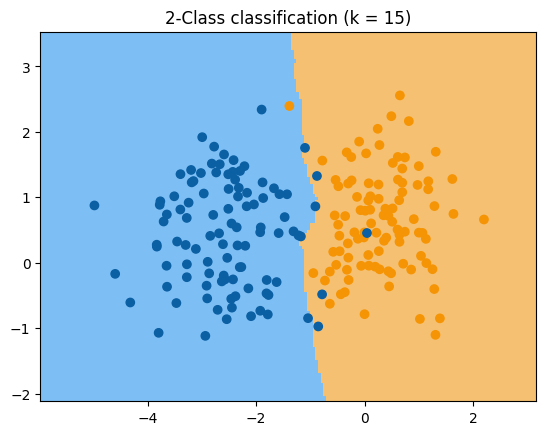

In [10]:


f1_knnx = .3*np.random.multivariate_normal([1,0], np.identity(2), 100) + .7*np.random.multivariate_normal([0,1], np.identity(2), 100) # orange class
f2_knnx = .8*np.random.multivariate_normal([-3,0], np.identity(2), 100) + .2*np.random.multivariate_normal([0,2], np.identity(2), 100) # blue class

labels_1=np.ones(f1_knnx.size//2)
labels_0=np.zeros(f2_knnx.size//2)
training=np.concatenate((f1_knnx,f2_knnx))
train_labels=np.concatenate((labels_1,labels_0))
clf = KNeighborsClassifier(15)
clf.fit(training, train_labels)
x_min, x_max = training[:, 0].min() - 1, training[:, 0].max() + 1
y_min, y_max = training[:, 1].min() - 1, training[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
np.arange(y_min, y_max, .05))

# Create color maps
cmap_light = ListedColormap([ '#7dbff5','#f5c071'])
cmap_bold = ListedColormap([ '#0b5fa3','#f59505'])

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(training[:, 0], training[:, 1], c=train_labels,cmap=cmap_bold )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (15))
plt.show()


## 1.2b

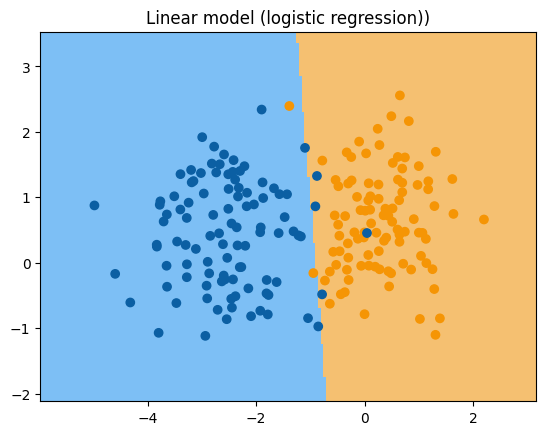

In [11]:

log_regfit = LogisticRegression().fit(training, train_labels)
Z1 = log_regfit.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot

plt.figure()
plt.pcolormesh(xx, yy, Z1.reshape(xx.shape), cmap=cmap_light)

# Plot also the training points
plt.scatter(training[:, 0], training[:, 1], c=train_labels,cmap=cmap_bold )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Linear model (logistic regression))")
plt.show()



## Part 1.3


In [12]:
knn_pred=clf.predict(training)
knn_miss = np.sum(knn_pred !=train_labels )
print("Misclassification error for 15-NN:", knn_miss)

log_preds= log_regfit.predict(training)
linear_miss = np.sum(log_preds !=train_labels )
print("Misclassification error for linear model:", linear_miss)

Misclassification error for 15-NN: 5
Misclassification error for linear model: 6


# Problem 3

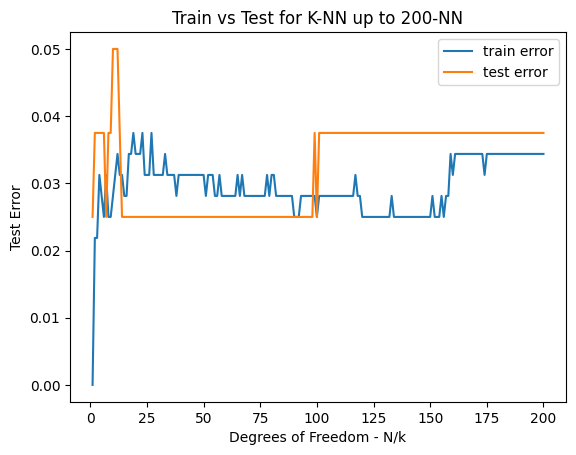

In [13]:
from sklearn.metrics import accuracy_score

N=200
# re generating data
# generating 200 points for each class
f1_multiKNN = .3*np.random.multivariate_normal([1,0], np.identity(2), 200) + .7*np.random.multivariate_normal([0,1], np.identity(2), 200) # orange class
f2_multiKNN = .8*np.random.multivariate_normal([-3,0], np.identity(2), 200) + .2*np.random.multivariate_normal([0,2], np.identity(2), 200) # blue class

#labelling classes
labels_1=np.ones(f1_multiKNN.size//2)
labels_0=np.zeros(f2_multiKNN.size//2)
# combine classes and labels into single array, getting ready for KNN
all_points=np.concatenate((f1_multiKNN,f2_multiKNN))
train_labels=np.concatenate((labels_1,labels_0))

#creating generic split
X_train, X_test, y_train, y_test = train_test_split( all_points, train_labels, test_size=0.2)

training_miss=[]
testing_miss=[]

for k in range(1,N+1):
    fitted_variablek_nn = KNeighborsClassifier(n_neighbors=k)
    fitted_variablek_nn.fit(X_train,y_train)
    train_preds =  fitted_variablek_nn.predict(X_train)
    test_preds =  fitted_variablek_nn.predict(X_test)
    
    training_miss.append(1 - accuracy_score(y_train, train_preds))
    testing_miss.append(1 - accuracy_score(y_test, test_preds))

plt.plot(range(1,N+1),training_miss, label='train error')
plt.plot(range(1,N+1),testing_miss,label='test error')
plt.xlabel('Degrees of Freedom - N/k')
plt.ylabel('Test Error')
plt.title('Train vs Test for K-NN up to 200-NN')
plt.legend()

    

# Problem 4


In [14]:
from sklearn.neighbors import KNeighborsRegressor

input_x=np.array([])
for i in range(200):
    input_x=np.append(input_x,np.random.uniform(-1,1,10))
input_x=input_x.reshape(200,10)

normalized=np.linalg.norm(input_x,axis=1,keepdims=True)
y=np.exp(-10*normalized**2)

KNN_regfit=KNeighborsRegressor(1).fit(input_x,y)
KNN_regpred=KNN_regfit.predict(np.zeros((1,10)))

bias= KNN_regpred- 1

print('the bias for when x= 0 is', bias[0][0])




the bias for when x= 0 is -0.9999978997354128


This is essentially 1, which means model has exceptionally high bias.